In [106]:
import os

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt, image as mpimg
import argparse
import imutils
import math

from KartriderKit.Vision.Utils import *
WORKPATH = "D:/GameProjects/Kartrider/SmartKartRider"
RAW_DATA_PATH = WORKPATH + "/raw_data/US"
%matplotlib inline

0.png
1.png
10.png
no lane detected
11.png


TypeError: 'NoneType' object is not iterable

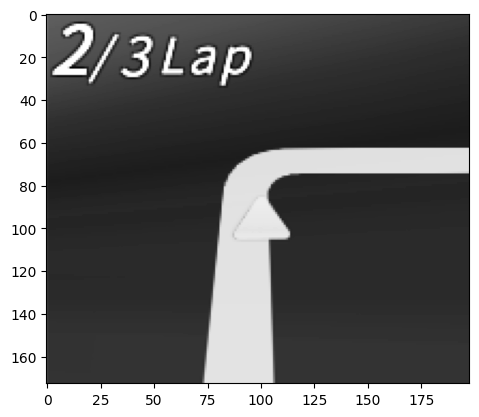

In [107]:
def process_image(image):
    global first_frame

    gray_image = grayscale(image)
    plt.imshow(gray_image, cmap="gray")
    mask_white = cv2.inRange(gray_image*255, 200, 240)
    kernel = np.ones((2, 2), np.uint8) #腐蚀
    mask_white = cv2.erode(mask_white, kernel, iterations=1)
    kernel_size = 5
    gauss_gray = gaussian_blur(mask_white,kernel_size)

    low_threshold = 50
    high_threshold = 150
    canny_edges = canny(gauss_gray,low_threshold,high_threshold)

    rho = 4
    theta = np.pi/180
    threshold = 30
    min_line_len = 100
    max_line_gap = 180

    line_image = hough_lines(canny_edges, rho, theta, threshold, min_line_len, max_line_gap)
    result = weighted_img(line_image, (image*255).astype("uint8"), α=0.8, β=1., λ=0.)
    plt.imshow(result, cmap = "gray")

    return result

for source_img in os.listdir(WORKPATH + "/raw_data/US/SmallMap/"):
    first_frame = 1
    image = mpimg.imread(WORKPATH + "./raw_data/US/SmallMap/"+source_img)
    print(source_img)
    processed = process_image(image)
    mpimg.imsave(WORKPATH + "/raw_data/US/SmallMap/annotated_"+source_img,processed)

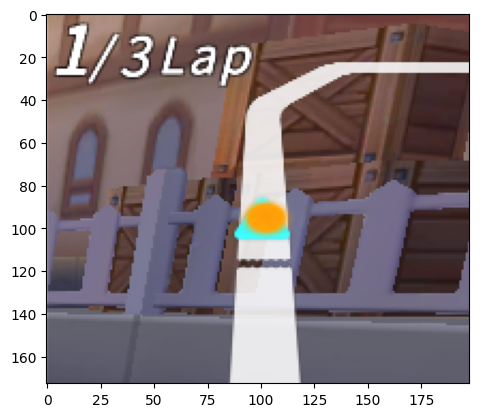

In [123]:
image = mpimg.imread(WORKPATH + "./raw_data/US/SmallMap/0.png")
# image = image[0:image.shape[0]//,:]
plt.imshow(image)

255

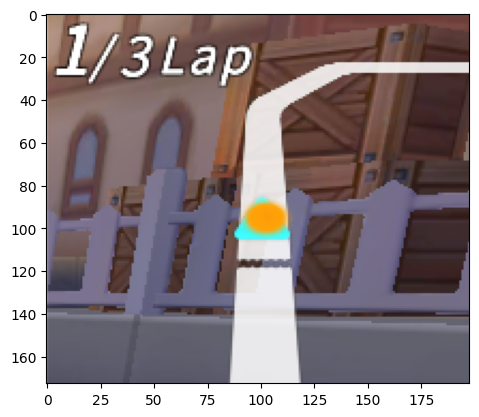

In [124]:
tt = image*255
tt = tt.astype("uint8")
plt.imshow(tt)
np.max(tt)

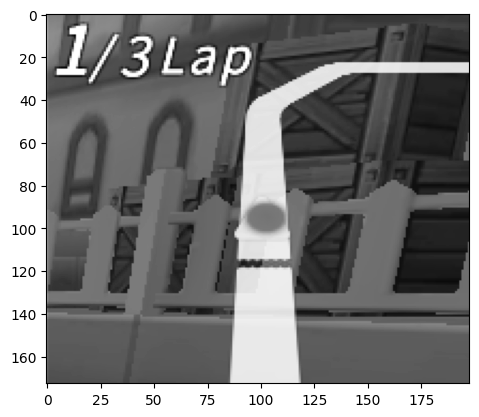

In [125]:
gray_image = grayscale(image)
plt.imshow(gray_image, cmap="gray")

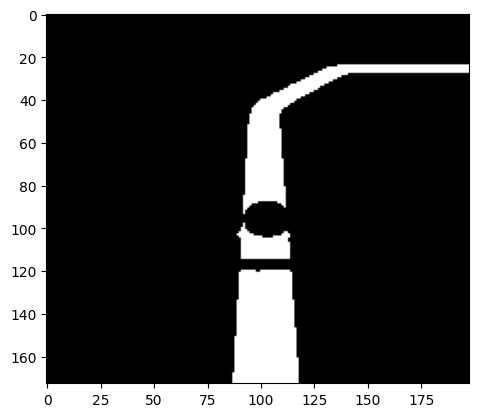

In [126]:
mask_white = cv2.inRange(gray_image*255, 200, 240)
kernel = np.ones((2, 2), np.uint8) #腐蚀
mask_white = cv2.erode(mask_white, kernel, iterations=1)
# plt.imshow(cv2.cvtColor(mask_white, cv2.COLOR_BGR2RGB))
plt.imshow(mask_white, cmap="gray")

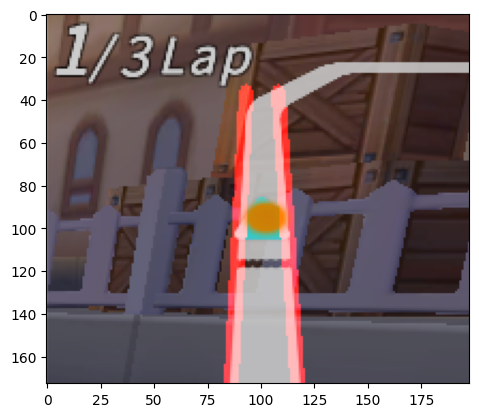

In [127]:
kernel_size = 5
gauss_gray = gaussian_blur(mask_white,kernel_size)
# gauss_gray = gaussian_blur(mask_yw_image,kernel_size)

#same as quiz values
low_threshold = 50
high_threshold = 150
canny_edges = canny(gauss_gray,low_threshold,high_threshold)

imshape = image.shape
lower_left = [imshape[1]/9,imshape[0]/2]
lower_right = [imshape[1]-imshape[1]/9,imshape[0]/2]
# lower_left = [imshape[1],imshape[0]]
# lower_right = [imshape[1],imshape[0]]
top_left = [imshape[1]/2-imshape[1]/8,imshape[0]/5]
top_right = [imshape[1]/2+imshape[1]/8,imshape[0]/5]
# top_left = [imshape[1]/2-imshape[1]/8,imshape[0]/2+imshape[0]/10]
# top_right = [imshape[1]/2+imshape[1]/8,imshape[0]/2+imshape[0]/10]


vertices = [np.array([lower_left,top_left,top_right,lower_right],dtype=np.int32)]
roi_image = region_of_interest(canny_edges, vertices)

#rho and theta are the distance and angular resolution of the grid in Hough space
#same values as quiz
rho = 4
theta = np.pi/180
#threshold is minimum number of intersections in a grid for candidate line to go to output
threshold = 30
min_line_len = 100
max_line_gap = 180
#my hough values started closer to the values in the quiz, but got bumped up considerably for the challenge video

# line_image = hough_lines(roi_image, rho, theta, threshold, min_line_len, max_line_gap)
line_image = hough_lines(canny_edges, rho, theta, threshold, min_line_len, max_line_gap)
result = weighted_img(line_image, (image*255).astype("uint8"), α=0.8, β=1., λ=0.)
plt.imshow(result, cmap = "gray")

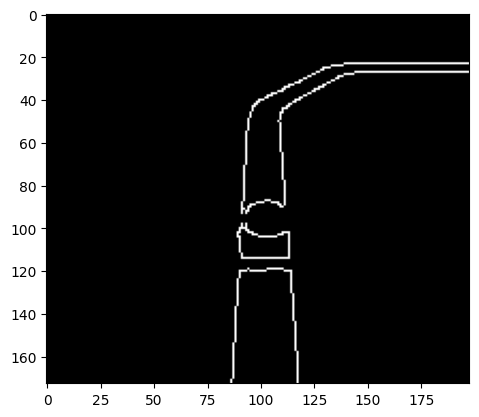

In [129]:
plt.imshow(canny_edges, cmap = "gray")

In [130]:
np.max(gauss_gray)

255